# Prediksi Risiko Penyakit Jantung
Proyek ini bertujuan untuk menganalisis dan mengklasifikasikan risiko penyakit jantung menggunakan beberapa algoritma machine learning. Dataset yang digunakan terdiri dari 1190 sampel dengan 12 fitur yang mencakup informasi demografis dan kesehatan pasien. Tujuan utama dari proyek ini adalah untuk mengklasifikasikan pasien sebagai Berisiko Tinggi atau Tidak Berisiko penyakit jantung berdasarkan fitur-fitur kesehatan yang tersedia. Model yang digunakan meliputi beberapa algoritma yang mudah diinterpretasikan, dan evaluasi dilakukan dengan berbagai metrik seperti akurasi, precision, recall, F1-score, dan ROC-AUC.

## Business Understanding
### Problem Statement
Bagaimana memprediksi risiko penyakit jantung pada pasien berdasarkan data kesehatan mereka?

### Goals
- Membangun model klasifikasi yang akurat untuk mengidentifikasi pasien berisiko tinggi penyakit jantung.
- Memilih model yang mudah diinterpretasikan untuk mendukung pengambilan keputusan medis.

### Solution Statement
1. Menggunakan Logistic Regression sebagai model baseline.
2. Menggunakan Decision Tree untuk interpretasi visual.
3. Melakukan hyperparameter tuning untuk meningkatkan performa model.

## Data Understanding
### Deskripsi Dataset
Dataset ini terdiri dari 1190 sampel dengan 12 fitur yang mencakup informasi demografis dan kesehatan pasien.

### Exploratory Data Analysis (EDA)

#### Langkah 1: Mengimpor Library yang Diperlukan dan Dataset
Pada langkah ini, kita mengimpor library yang diperlukan untuk analisis data, visualisasi, dan machine learning.
- Pandas digunakan untuk manipulasi dan analisis data.
- NumPy digunakan untuk perhitungan numerik.
- Seaborn dan Matplotlib digunakan untuk visualisasi data.
- Scikit-learn digunakan untuk pemodelan machine learning dan evaluasi.
Setelah mengimpor library dan dataset yang diperlukan, kita siap untuk memulai proses analisis dan pemodelan machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('heart_disease_dataset.csv')

#### Langkah 2: Memuat dan Mengeksplorasi Data
Setelah dataset dimuat, kita akan melakukan eksplorasi data untuk memahami struktur dan karakteristik dasar data. Langkah-langkah yang dilakukan meliputi:
- Memeriksa informasi dasar dataset (tipe data, non-null counts).
- Menampilkan statistik deskriptif untuk fitur numerik.
- Melihat beberapa baris pertama dataset.
- Menganalisis distribusi fitur numerik dan kategorikal.
- Membuat matriks korelasi untuk memahami hubungan antar fitur.
- Membuat pairplot untuk melihat hubungan antar fitur dengan target.
- Memeriksa adanya missing values.
- Mengidentifikasi outliers menggunakan Z-Score.

**Menampilkan informasi dasar dataset**

In [2]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Distribusi Fitur Numerik**  
Pada bagian ini, kita akan memvisualisasikan distribusi fitur numerik menggunakan histogram dan boxplot. Histogram memberikan gambaran tentang distribusi frekuensi data, sedangkan boxplot membantu dalam mengidentifikasi outliers.

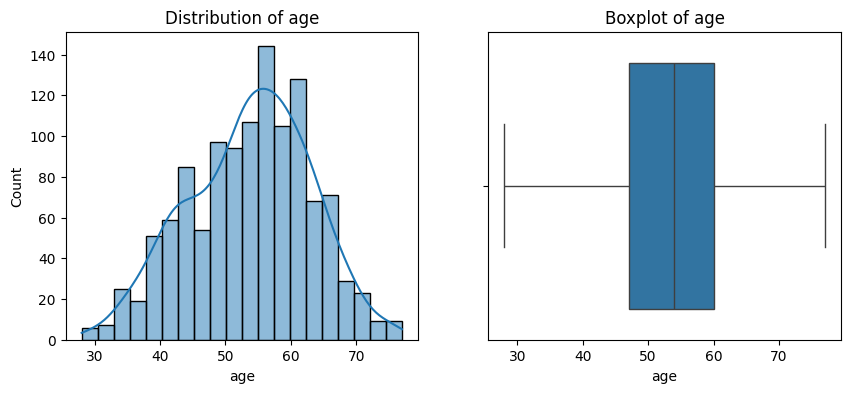

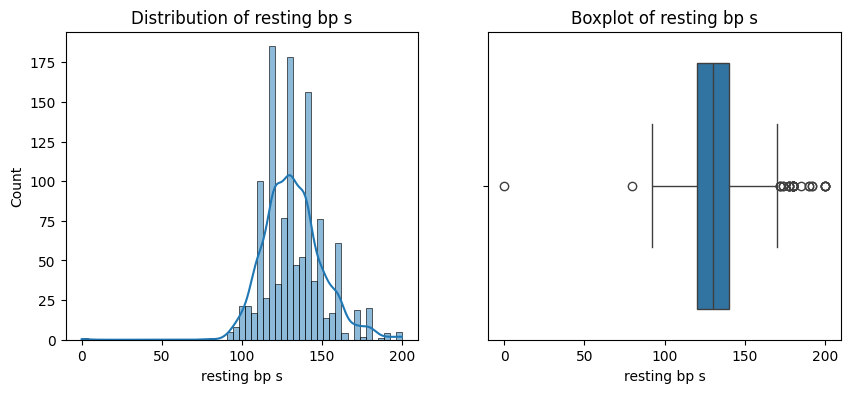

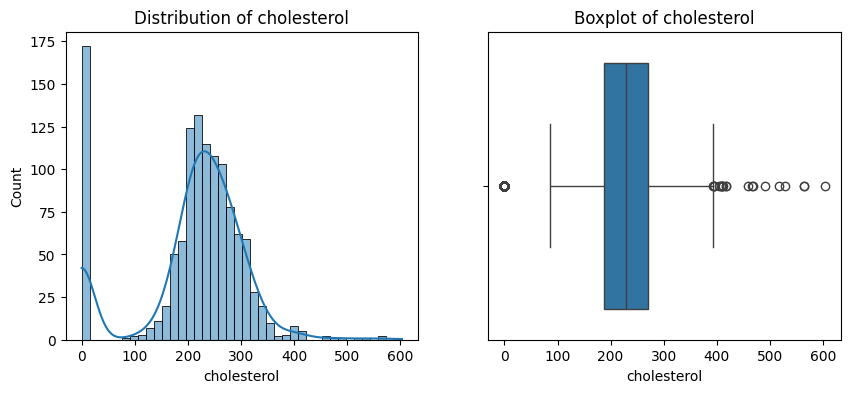

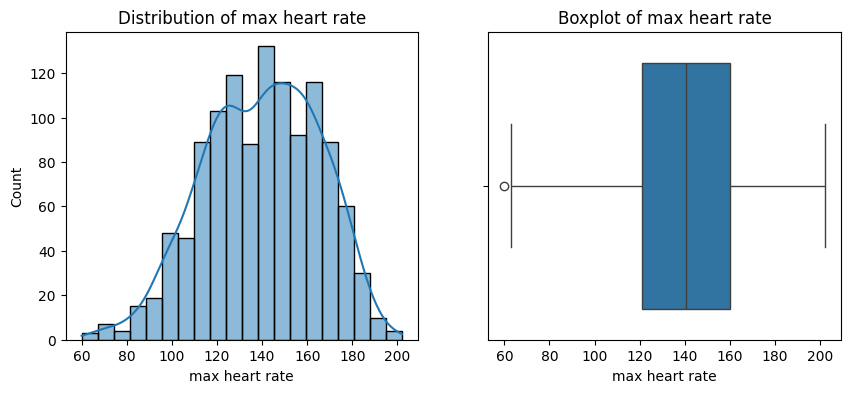

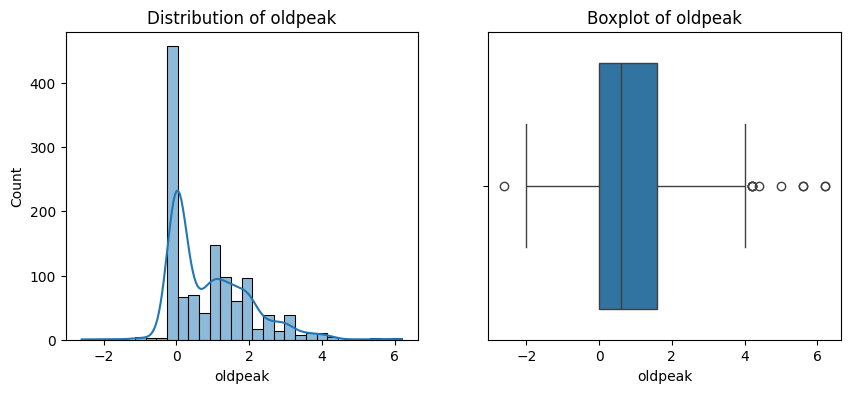

In [3]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')

    plt.show()

**Distribusi Fitur Kategorikal**  
Visualisasi distribusi fitur kategorikal menggunakan countplot untuk memahami proporsi setiap kategori dalam fitur tersebut.

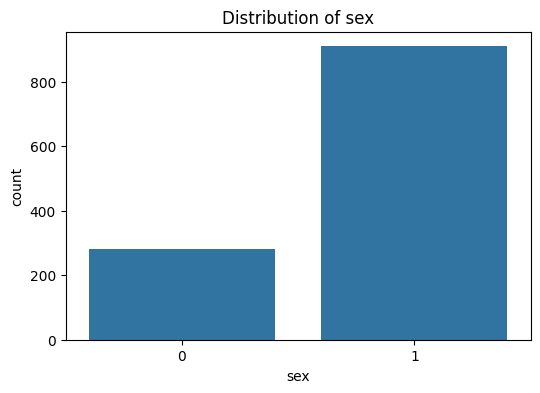

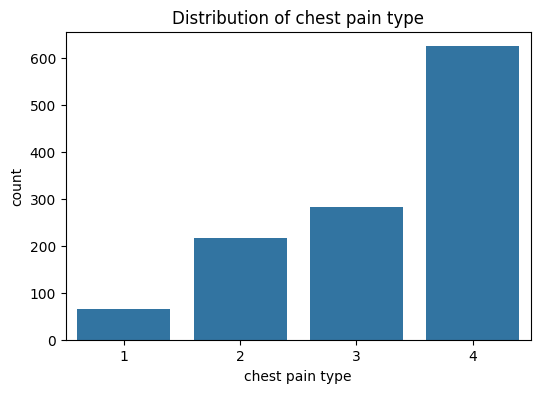

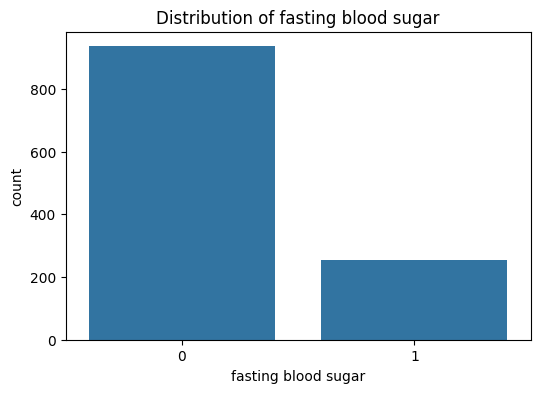

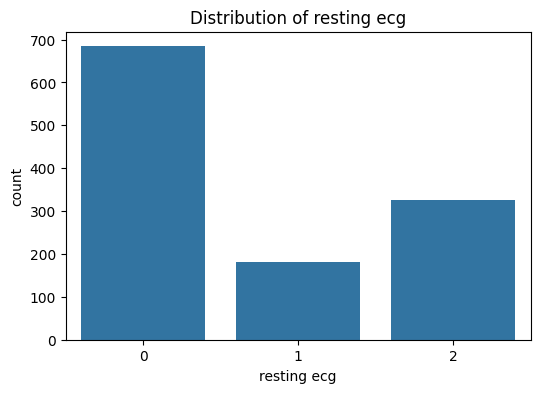

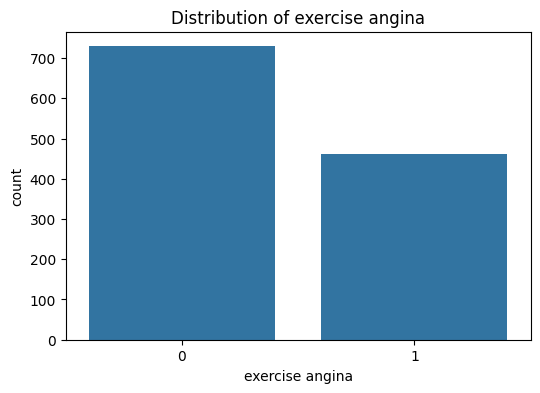

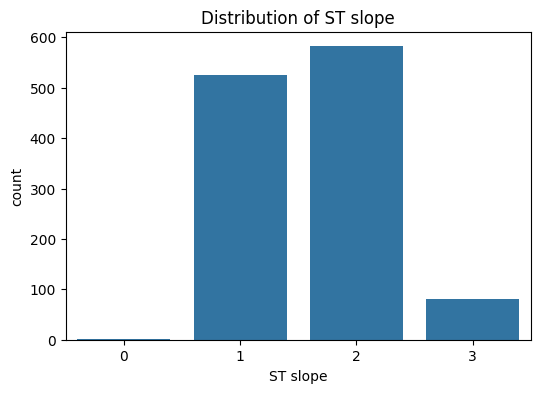

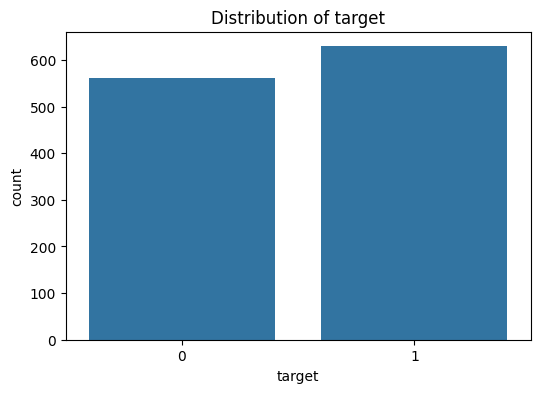

In [4]:
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

**Matriks Korelasi**  
Membuat heatmap dari matriks korelasi untuk melihat hubungan antar fitur numerik. Ini membantu dalam memahami fitur mana yang saling berkorelasi tinggi.

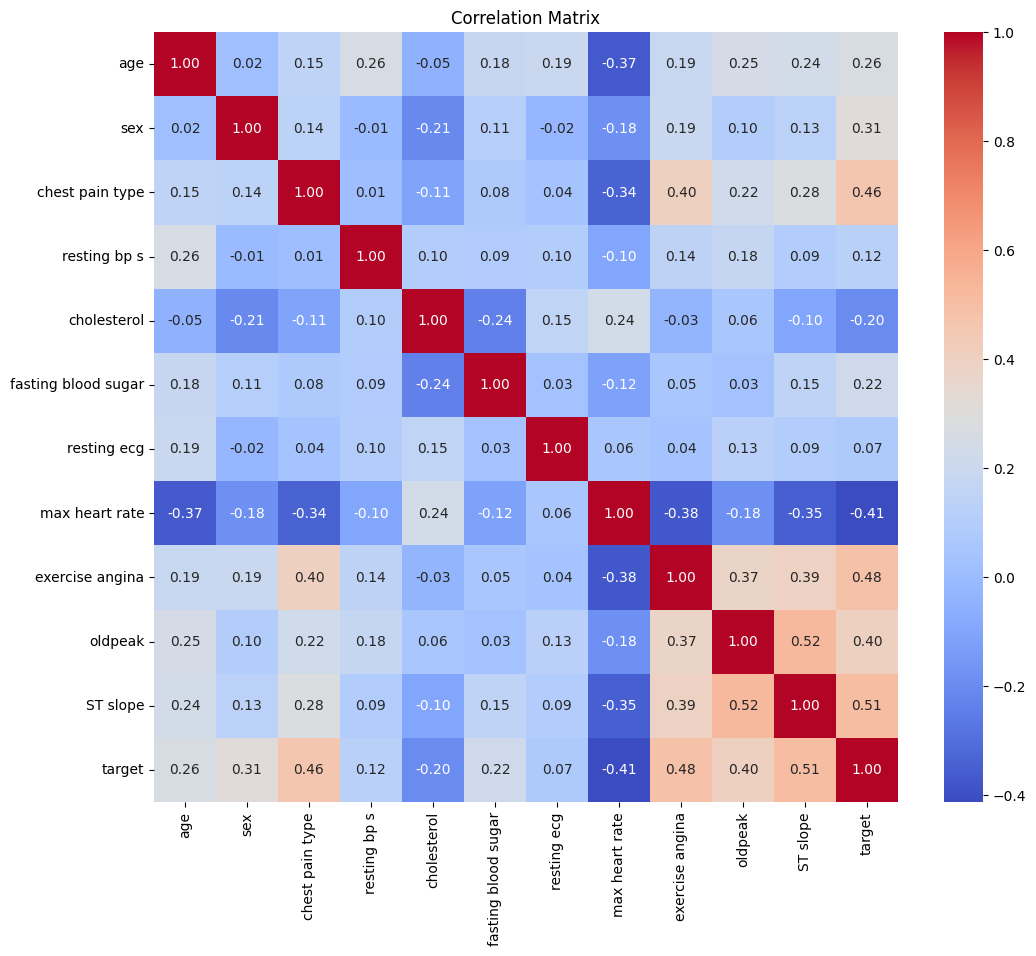

In [5]:
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Pairplot**  
Membuat pairplot untuk memvisualisasikan hubungan antar fitur dan target. Pairplot membantu dalam melihat pola hubungan antar fitur secara lebih mendalam.

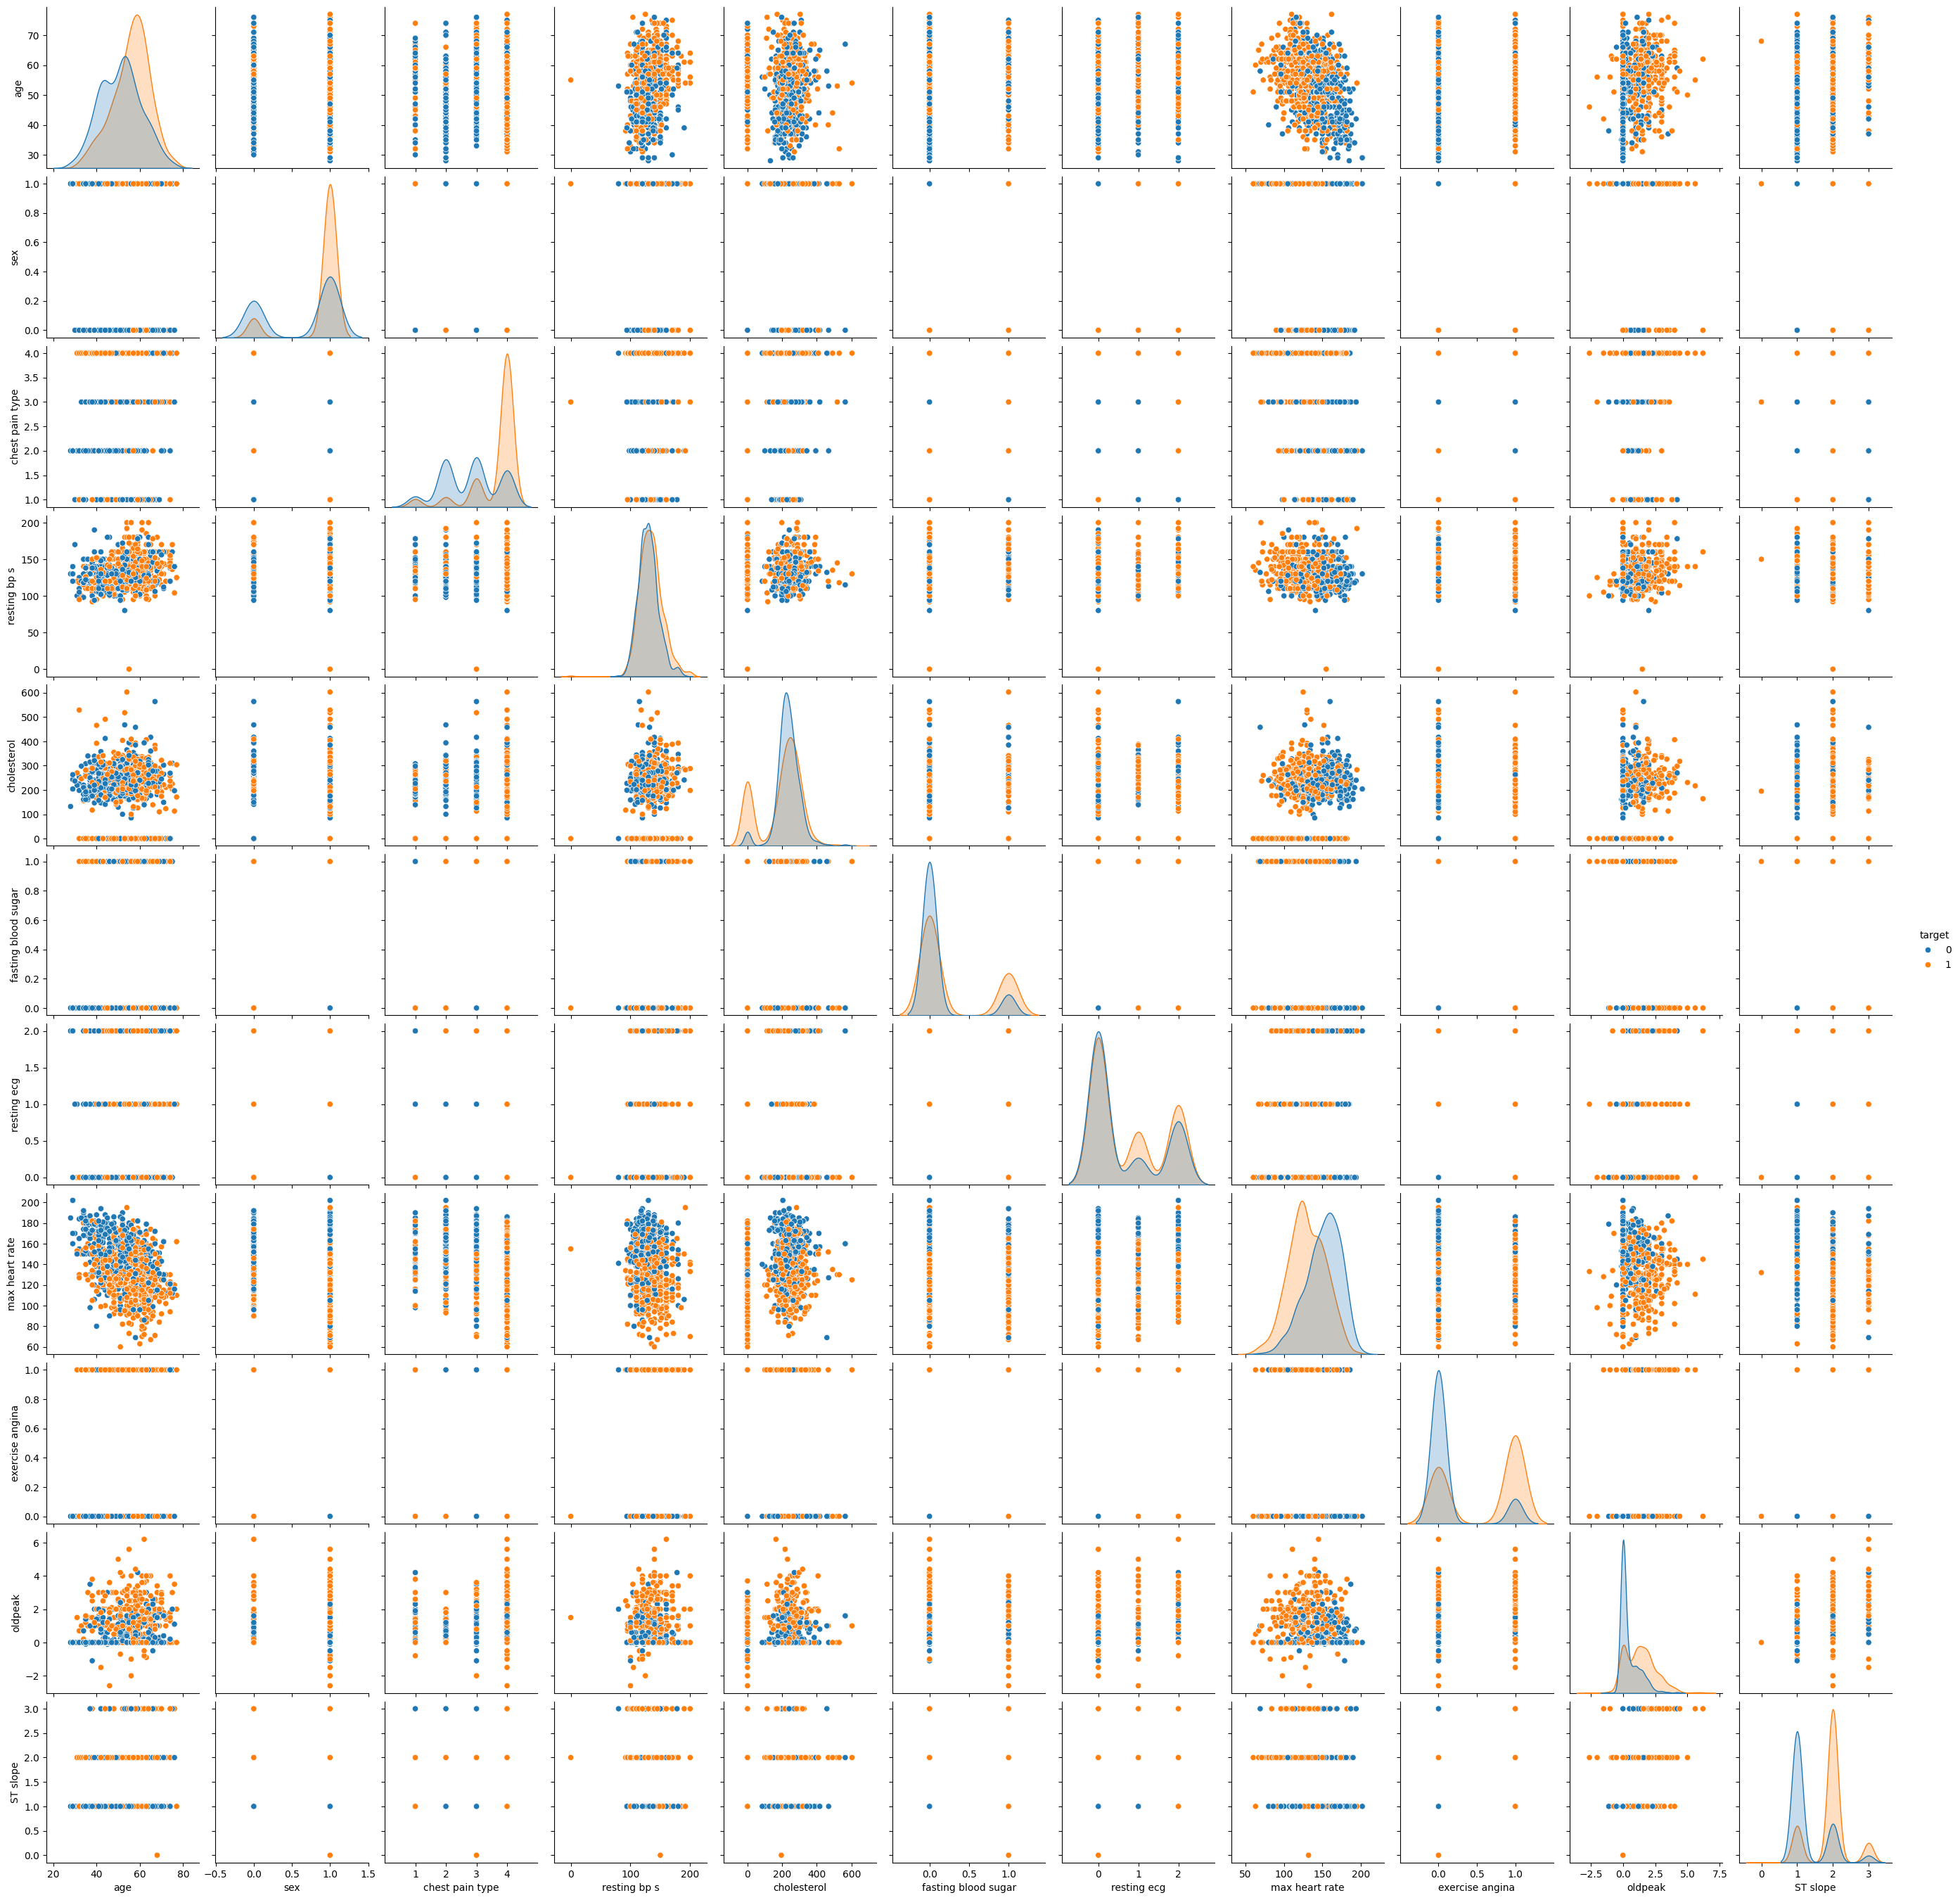

In [6]:
sns.pairplot(data, hue='target')
plt.show()

**Pemeriksaan Missing Values**  
Memeriksa apakah terdapat nilai yang hilang (missing values) dalam dataset. Tidak ada missing values yang ditemukan.

In [7]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


## Data Preparation
Pada langkah ini, kita akan melakukan persiapan data yang meliputi:
- Encoding fitur kategorikal menggunakan One-Hot Encoding.
- Feature Scaling menggunakan StandardScaler untuk fitur numerik.
- Feature Engineering dengan membuat fitur interaksi antara 'age' dan 'cholesterol'.

**Encoding Kategorikal**  
Untuk fitur kategorikal seperti `chest pain type`, `resting ecg`, dan `ST slope`, dilakukan One-Hot Encoding. Ini mengubah fitur kategorikal menjadi format numerik yang dapat digunakan oleh algoritma machine learning.

In [8]:
categorical_features = ['chest pain type', 'resting ecg', 'ST slope']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print(f"Jumlah fitur setelah One-Hot Encoding: {data.shape[1]}")

Jumlah fitur setelah One-Hot Encoding: 17


**Feature Scaling**  
Fitur numerik seperti `age`, `resting bp s`, dan `cholesterol` di-standardisasi menggunakan StandardScaler. Standardisasi memastikan bahwa setiap fitur memiliki rata-rata 0 dan deviasi standar 1, yang penting untuk algoritma seperti Logistic Regression dan Decision Tree.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print("Feature scaling selesai dilakukan menggunakan StandardScaler.")

Feature scaling selesai dilakukan menggunakan StandardScaler.


**Feature Engineering**  
Membuat fitur baru yang merupakan interaksi antara `age` dan `cholesterol`. Fitur ini dapat membantu model dalam menangkap hubungan kompleks antara dua fitur tersebut.

In [10]:
data['age_cholesterol'] = data['age'] * data['cholesterol']

## Modeling
Pada langkah ini, kita akan melakukan pemodelan menggunakan dua algoritma yang mudah diinterpretasikan:
1. Logistic Regression: Model klasifikasi yang mudah diinterpretasikan, cocok untuk masalah klasifikasi biner.
2. Decision Tree: Model yang menyediakan interpretasi visual yang baik dan dapat menangkap hubungan non-linear antar fitur.
Selain itu, kita akan melakukan evaluasi model menggunakan berbagai metrik dan memvisualisasikan ROC Curve untuk masing-masing model.

**Memisahkan Data Train dan Test**

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Logistic Regression**  
Model ini dipilih karena kemudahan interpretasinya dalam memahami hubungan antara fitur dan target.

**Melatih Model Logistic Regression**  
Melatih model Logistic Regression menggunakan data training dan melakukan prediksi pada data testing. Evaluasi model dilakukan menggunakan classification report dan ROC-AUC score. ROC Curve juga divisualisasikan untuk melihat performa model dalam membedakan kelas.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.84      0.89      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

ROC-AUC: 0.9309098639455782


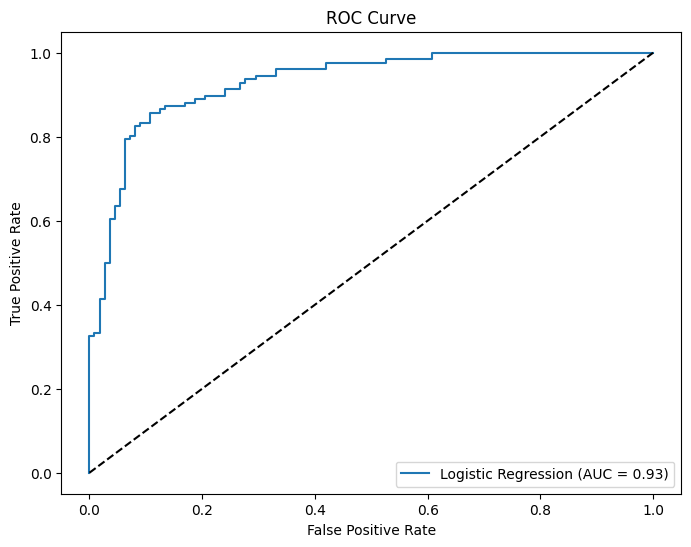

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Inisialisasi model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training
log_reg.fit(X_train, y_train)

# Prediksi
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Evaluasi
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Decision Tree Classifier**  
Melatih model Decision Tree menggunakan data training dan melakukan prediksi pada data testing. Evaluasi model dilakukan menggunakan classification report dan ROC-AUC score. ROC Curve juga divisualisasikan, dan struktur Decision Tree divisualisasikan untuk interpretasi visual.

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       112
           1       0.86      0.79      0.83       126

    accuracy                           0.82       238
   macro avg       0.82      0.83      0.82       238
weighted avg       0.83      0.82      0.82       238

ROC-AUC: 0.8253968253968254


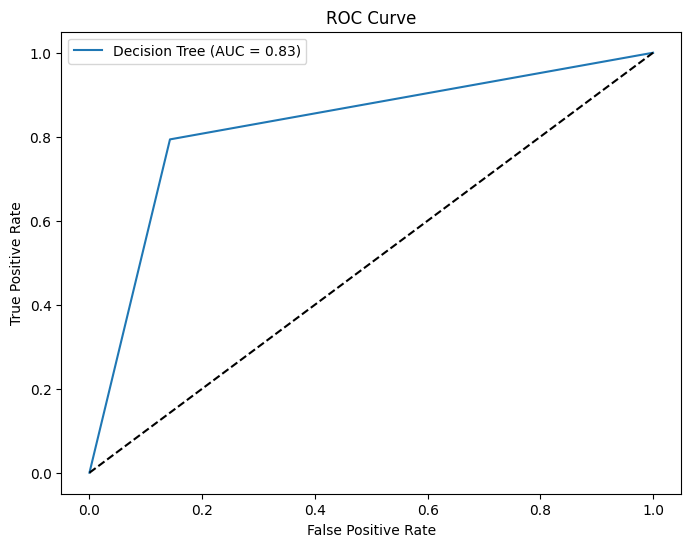

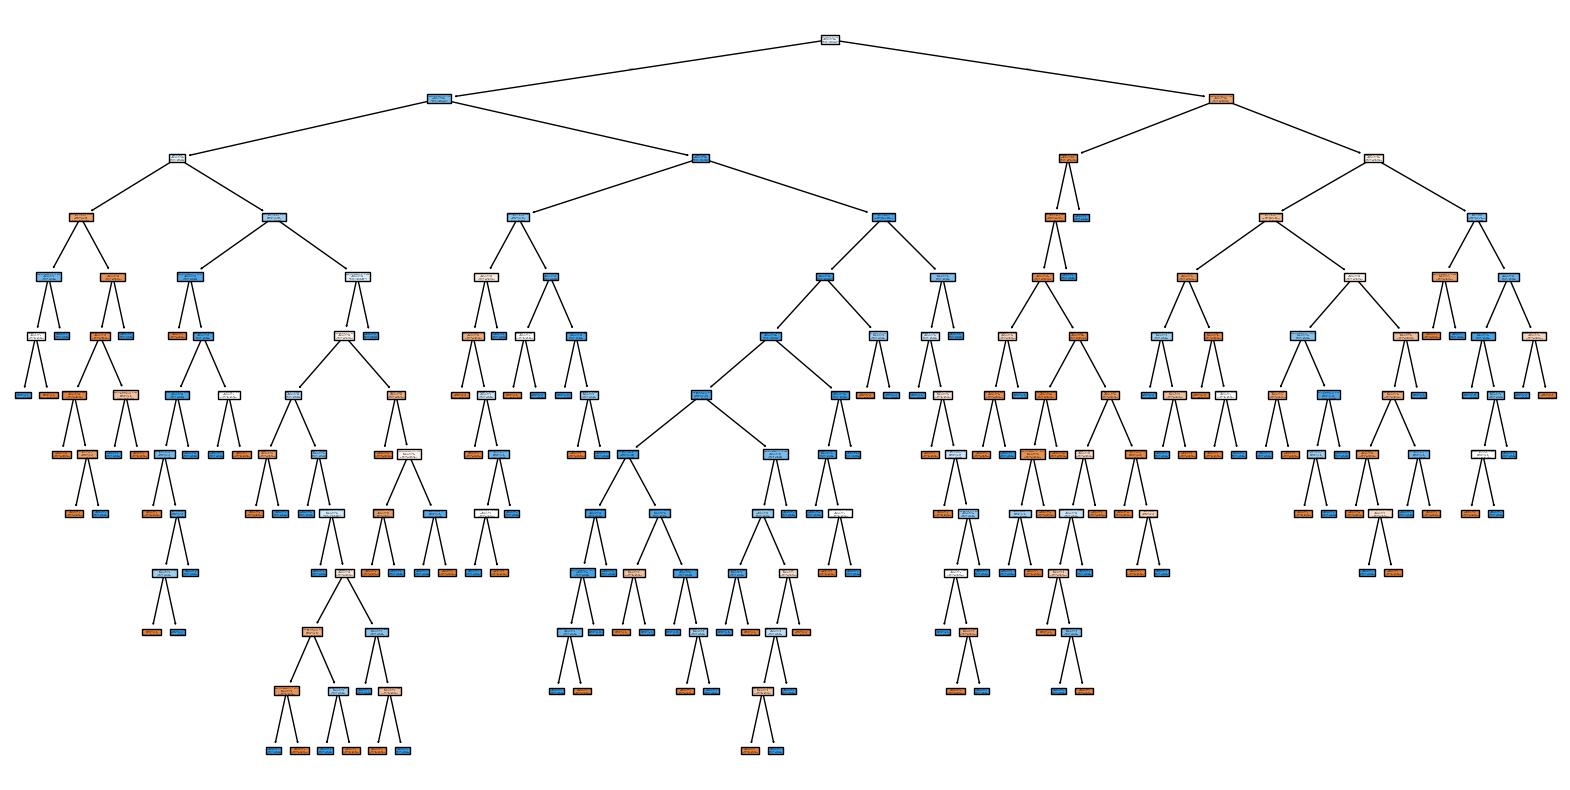

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Training
dt.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]

# Evaluasi
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_dt)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

## Evaluation
Pada langkah ini, kita akan melakukan evaluasi lebih lanjut terhadap model yang telah dilatih. Evaluasi mencakup:
- Penggunaan metrik evaluasi seperti akurasi, precision, recall, F1-score, dan ROC-AUC.
- Hyperparameter tuning menggunakan GridSearchCV untuk meningkatkan performa model.
- Cross-validation untuk memastikan model tidak overfitting.

**Hyperparameter Tuning untuk Logistic Regression**  
Melakukan hyperparameter tuning pada model Logistic Regression menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik yang meningkatkan performa model.

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best ROC-AUC Score: 0.912373340255374
Logistic Regression Best Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       112
           1       0.85      0.88      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

Logistic Regression Best ROC-AUC: 0.930484693877551


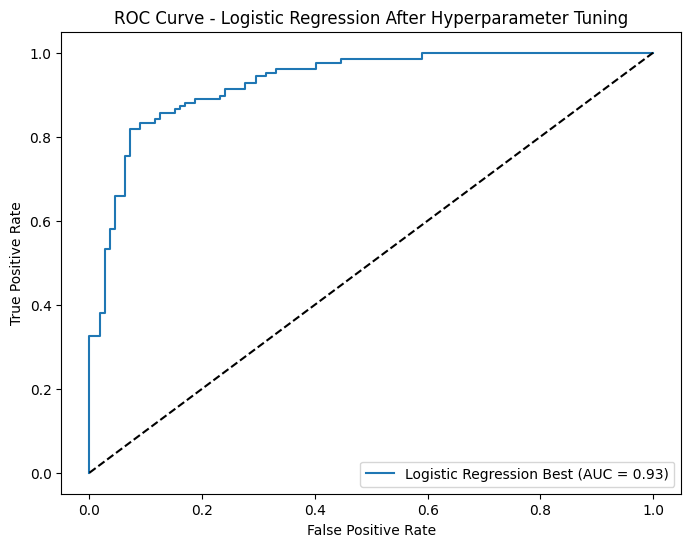

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_log_reg.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best ROC-AUC Score:", grid_log_reg.best_score_)

# Prediksi dengan Logistic Regression Baru
y_pred_lr_best = grid_log_reg.predict(X_test)
y_pred_proba_lr_best = grid_log_reg.predict_proba(X_test)[:,1]

# Evaluasi Logistic Regression Baru
print("Logistic Regression Best Classification Report:")
print(classification_report(y_test, y_pred_lr_best))

print("Logistic Regression Best ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr_best))

# Plot ROC Curve Logistic Regression Baru
fpr_lr_best, tpr_lr_best, _ = roc_curve(y_test, y_pred_proba_lr_best)
plt.figure(figsize=(8,6))
plt.plot(fpr_lr_best, tpr_lr_best, label='Logistic Regression Best (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_lr_best)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression After Hyperparameter Tuning')
plt.legend()
plt.show()

**Hyperparameter Tuning untuk Decision Tree**  
Melakukan hyperparameter tuning pada model Decision Tree menggunakan GridSearchCV untuk menemukan kombinasi parameter terbaik yang meningkatkan performa model.

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best ROC-AUC Score: 0.8901675121444729
Decision Tree Best Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       112
           1       0.85      0.81      0.83       126

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238

Decision Tree Best ROC-AUC: 0.8766652494331065


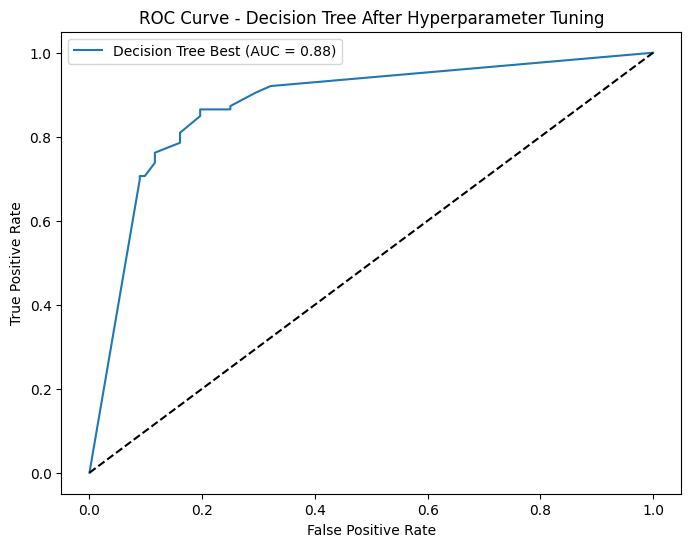

In [15]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best ROC-AUC Score:", grid_dt.best_score_)

# Prediksi dengan Decision Tree terbaik
y_pred_dt_best = grid_dt.predict(X_test)
y_pred_proba_dt_best = grid_dt.predict_proba(X_test)[:,1]

# Evaluasi Decision Tree terbaik
print("Decision Tree Best Classification Report:")
print(classification_report(y_test, y_pred_dt_best))

print("Decision Tree Best ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt_best))

# Plot ROC Curve Decision Tree terbaik
fpr_dt_best, tpr_dt_best, _ = roc_curve(y_test, y_pred_proba_dt_best)
plt.figure(figsize=(8,6))
plt.plot(fpr_dt_best, tpr_dt_best, label='Decision Tree Best (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_dt_best)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree After Hyperparameter Tuning')
plt.legend()
plt.show()

**Cross-Validation**  
Melakukan cross-validation dengan 5 fold untuk kedua model guna memastikan bahwa model tidak overfitting dan memiliki performa yang konsisten.

In [16]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
cv_scores_log = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression CV ROC-AUC Scores:", cv_scores_log)
print("Mean CV ROC-AUC Score:", cv_scores_log.mean())

# Decision Tree
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='roc_auc')
print("Decision Tree CV ROC-AUC Scores:", cv_scores_dt)
print("Mean CV ROC-AUC Score:", cv_scores_dt.mean())

Logistic Regression CV ROC-AUC Scores: [0.88943894 0.90011001 0.92846813 0.91911111 0.92388889]
Mean CV ROC-AUC Score: 0.9122034165214273
Decision Tree CV ROC-AUC Scores: [0.81644664 0.87079208 0.87451329 0.85277778 0.86333333]
Mean CV ROC-AUC Score: 0.8555726258019061


**Evaluasi Lanjutan**  
Menampilkan kembali classification report dan ROC-AUC score setelah cross-validation dan hyperparameter tuning.

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr_best))

# Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_best))

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt_best))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.84      0.89      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

Logistic Regression ROC-AUC: 0.930484693877551
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       112
           1       0.85      0.81      0.83       126

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238

Decision Tree ROC-AUC: 0.8766652494331065


### Menyimpan dan Memuat Model Terbaik
Setelah menentukan model terbaik berdasarkan metrik evaluasi, kita akan menyimpan model tersebut menggunakan joblib agar dapat digunakan kembali di masa depan tanpa perlu melatih ulang. Kemudian, kita akan memuat model tersebut dan mengujinya kembali untuk memastikan bahwa model bekerja dengan baik setelah disimpan.

In [18]:
import joblib

# Calculate ROC AUC scores
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr_best)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt_best)

# Determine the best model
best_model = log_reg if roc_auc_lr > roc_auc_dt else dt
best_model_name = "Logistic Regression" if roc_auc_lr > roc_auc_dt else "Decision Tree"

# Save the best model
joblib.dump(best_model, 'model_terbaik.pkl')
print(f"Model terbaik ({best_model_name}) telah disimpan sebagai 'model_terbaik.pkl'.")

Model terbaik (Logistic Regression) telah disimpan sebagai 'model_terbaik.pkl'.


**Memuat dan Menguji Model Terbaik**  
Memuat model terbaik yang telah disimpan dan melakukan prediksi kembali untuk memastikan bahwa model tersebut bekerja dengan baik setelah disimpan.

Model terbaik (Logistic Regression) berhasil dimuat.
ROC-AUC dari model yang dimuat: 0.9309

Classification Report untuk model yang dimuat (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.84      0.89      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



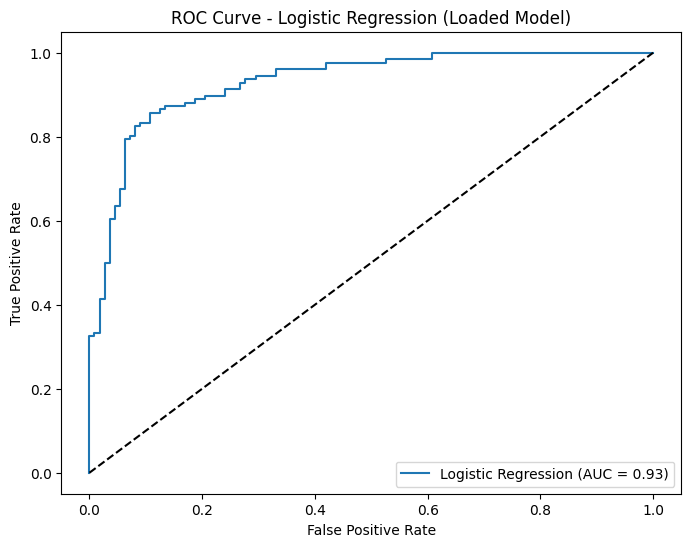

In [19]:
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Load the model
try:
  best_model_loaded = joblib.load('model_terbaik.pkl')
  print(f"Model terbaik ({best_model_name}) berhasil dimuat.")
except FileNotFoundError:
  print("Error: Model file 'model_terbaik.pkl' not found!")
  # Handle the error gracefully, maybe exit or provide options

# Make predictions
predicted_proba_loaded = best_model_loaded.predict_proba(X_test)[:, 1]
y_predicted_loaded = best_model_loaded.predict(X_test)

# Evaluate the model
roc_auc_loaded = roc_auc_score(y_test, predicted_proba_loaded)
print(f"ROC-AUC dari model yang dimuat: {roc_auc_loaded:.4f}")

# Classification Report (assuming classification_report is imported)
print(f"\nClassification Report untuk model yang dimuat ({best_model_name}):")
print(classification_report(y_test, y_predicted_loaded))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba_loaded)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_loaded:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} (Loaded Model)')
plt.legend()
plt.show()

### Visualisasi Hasil
Pada bagian ini, kita akan melakukan visualisasi hasil dari model yang telah dilatih untuk memberikan gambaran yang lebih jelas tentang performa masing-masing model. Visualisasi ini mencakup:
1. Menampilkan perbandingan metrik evaluasi antara Logistic Regression dan Decision Tree.
2. Menampilkan ROC Curve untuk kedua model dalam satu plot.
3. Menampilkan Confusion Matrix untuk kedua model secara berdampingan.
4. Menampilkan fitur-fitur yang paling penting menurut model Decision Tree.
5. Membuat tabel ringkasan metrik evaluasi untuk kedua model agar memudahkan perbandingan.

**1. Perbandingan Metrik Model**  
Pada bagian ini, kita akan membuat bar plot untuk membandingkan metrik evaluasi (Akurasi, Precision, Recall, F1-Score, ROC-AUC) antara Logistic Regression dan Decision Tree.

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.852941   0.847328  0.880952  0.863813  0.930485
1        Decision Tree  0.823529   0.850000  0.809524  0.829268  0.876665


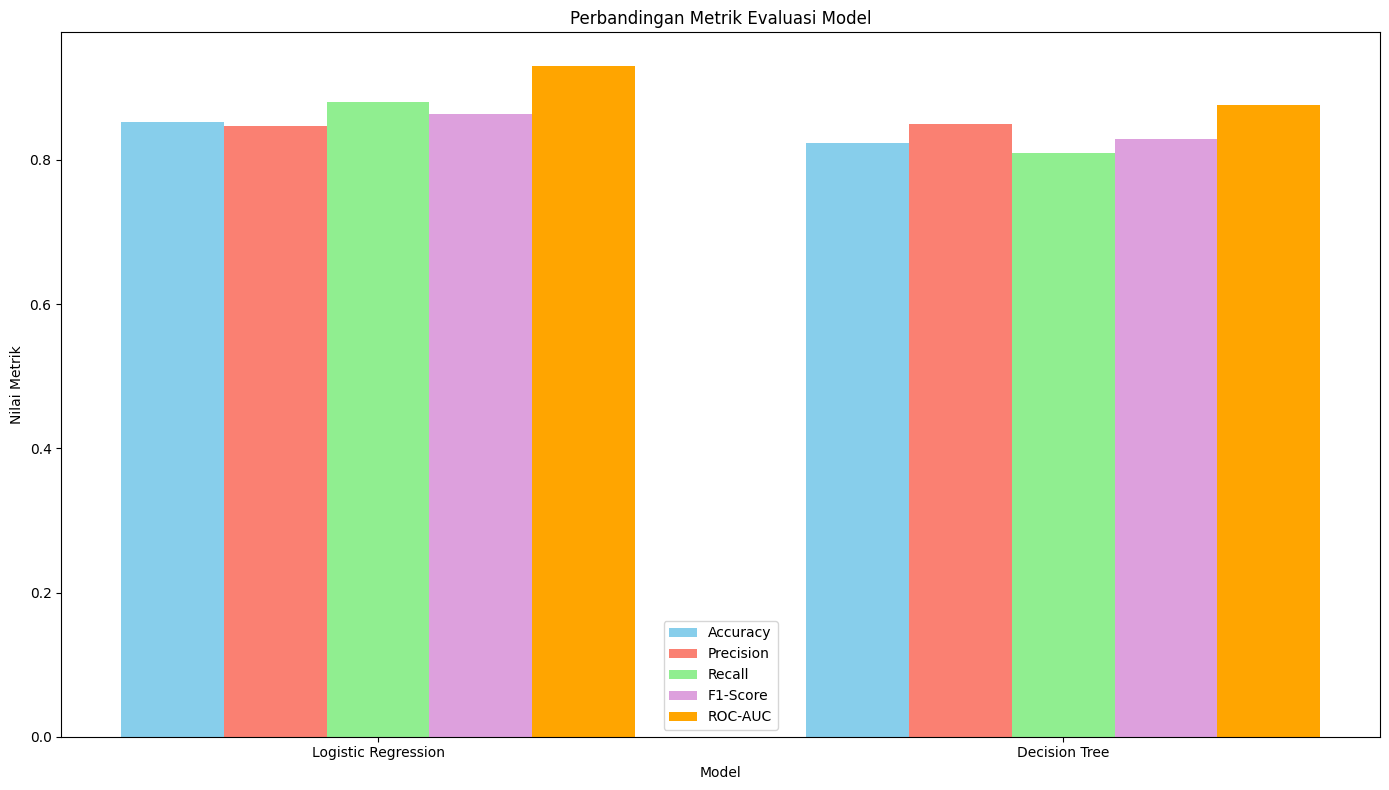

In [20]:
# Mengimpor library tambahan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Mengumpulkan metrik evaluasi untuk kedua model
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr_best), accuracy_score(y_test, y_pred_dt_best)],
    'Precision': [precision_score(y_test, y_pred_lr_best), precision_score(y_test, y_pred_dt_best)],
    'Recall': [recall_score(y_test, y_pred_lr_best), recall_score(y_test, y_pred_dt_best)],
    'F1-Score': [f1_score(y_test, y_pred_lr_best), f1_score(y_test, y_pred_dt_best)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_lr_best), roc_auc_score(y_test, y_pred_proba_dt_best)]
}

# Membuat DataFrame dari metrik
metrics_df = pd.DataFrame(metrics)

# Menampilkan DataFrame metrik
print(metrics_df)

# Mengatur ukuran plot
plt.figure(figsize=(14, 8))

# Menentukan posisi bar
ind = np.arange(len(metrics_df['Model']))
width = 0.15

# Menambahkan setiap metrik ke plot
plt.bar(ind, metrics_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(ind + width, metrics_df['Precision'], width, label='Precision', color='salmon')
plt.bar(ind + 2*width, metrics_df['Recall'], width, label='Recall', color='lightgreen')
plt.bar(ind + 3*width, metrics_df['F1-Score'], width, label='F1-Score', color='plum')
plt.bar(ind + 4*width, metrics_df['ROC-AUC'], width, label='ROC-AUC', color='orange')

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Nilai Metrik')
plt.title('Perbandingan Metrik Evaluasi Model')
plt.xticks(ind + 2*width, metrics_df['Model'])
plt.legend()

plt.tight_layout()
plt.show()

**2. ROC Curves untuk Semua Model**  
Menampilkan ROC Curve untuk kedua model dalam satu plot untuk memudahkan perbandingan kemampuan masing-masing model dalam membedakan kelas.

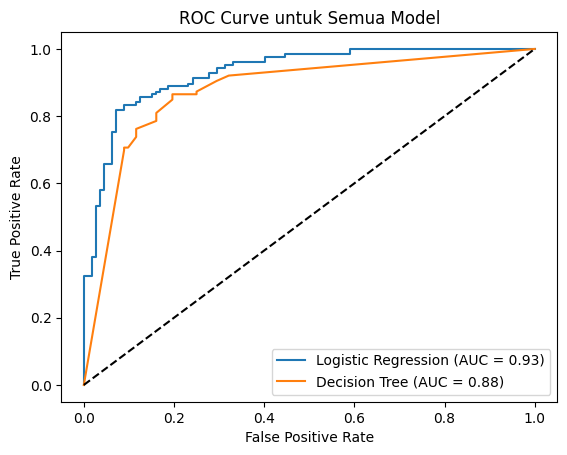

In [21]:
# Plot ROC Curve untuk Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_lr_best)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_lr_best)))

# Plot ROC Curve untuk Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt_best)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_dt_best)))

# Plot garis diagonal
plt.plot([0,1], [0,1], 'k--')

# Menambahkan label dan judul
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Semua Model')
plt.legend()
plt.show()

**3. Confusion Matrix untuk Semua Model**  
Menampilkan Confusion Matrix untuk kedua model secara berdampingan untuk melihat distribusi prediksi mereka.

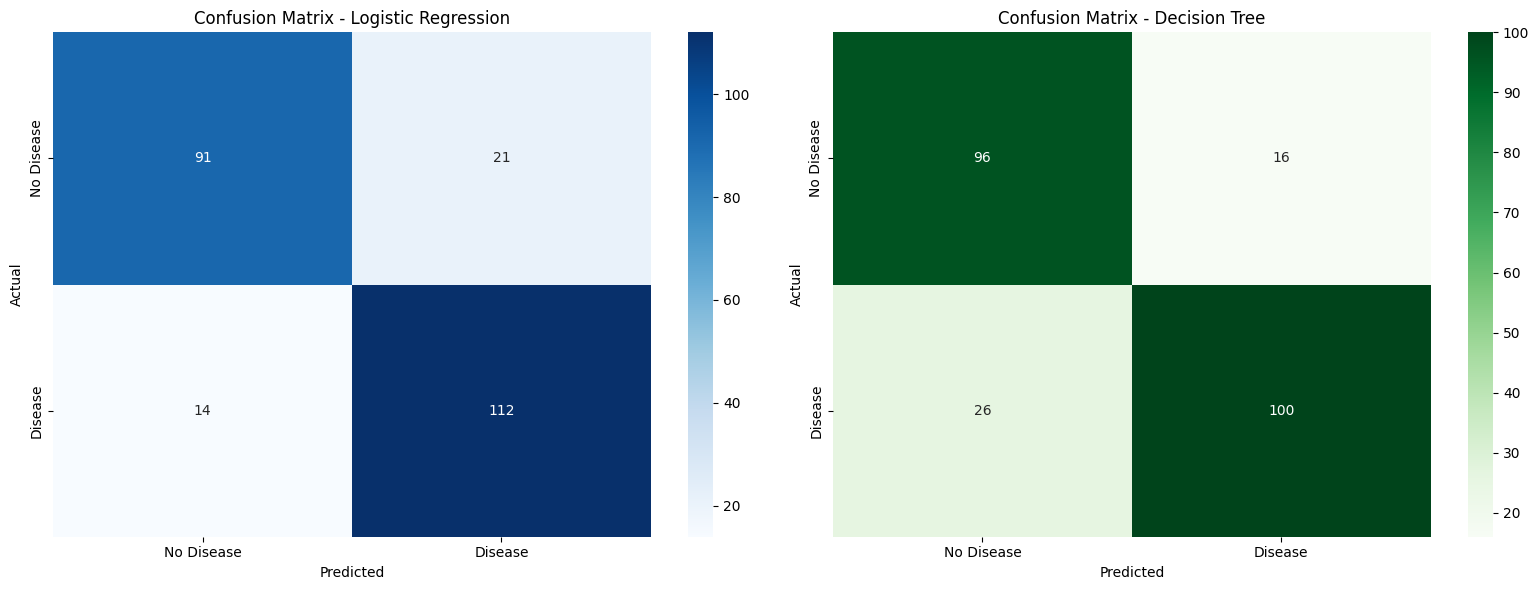

In [22]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix untuk Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)

# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Confusion Matrix Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].xaxis.set_ticklabels(['No Disease', 'Disease'])
axes[0].yaxis.set_ticklabels(['No Disease', 'Disease'])

# Confusion Matrix Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Decision Tree')
axes[1].xaxis.set_ticklabels(['No Disease', 'Disease'])
axes[1].yaxis.set_ticklabels(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

**4. Feature Importance (Decision Tree)**  
Menampilkan fitur-fitur yang paling penting menurut model Decision Tree untuk memahami fitur mana yang paling berpengaruh dalam prediksi risiko penyakit jantung.

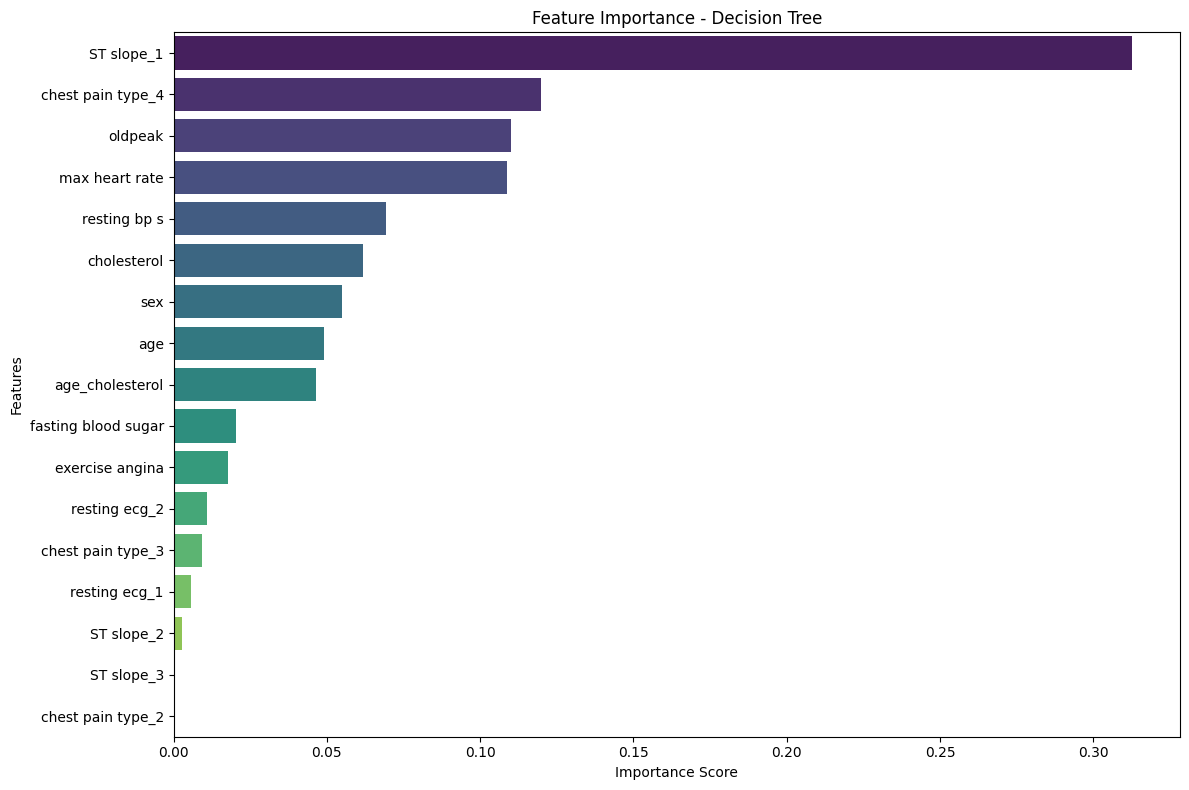

In [23]:
# Mendapatkan feature importance dari Decision Tree
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)

# Mengurutkan feature importance
feature_importances = feature_importances.sort_values(ascending=False)

# Menampilkan feature importance
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

**5. Ringkasan Metrik Evaluasi dalam Tabel**  
Membuat tabel ringkasan metrik evaluasi untuk kedua model agar memudahkan perbandingan.

In [24]:
# Membuat ringkasan metrik evaluasi
summary_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr_best), accuracy_score(y_test, y_pred_dt_best)],
    'Precision': [precision_score(y_test, y_pred_lr_best), precision_score(y_test, y_pred_dt_best)],
    'Recall': [recall_score(y_test, y_pred_lr_best), recall_score(y_test, y_pred_dt_best)],
    'F1-Score': [f1_score(y_test, y_pred_lr_best), f1_score(y_test, y_pred_dt_best)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_lr_best), roc_auc_score(y_test, y_pred_proba_dt_best)]
}

# Membuat DataFrame
summary_df = pd.DataFrame(summary_metrics)

# Menampilkan tabel
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.852941   0.847328  0.880952  0.863813  0.930485
1        Decision Tree  0.823529   0.850000  0.809524  0.829268  0.876665
